# _Goodreads "Good" and "Bad" Book Genres_
## _Leah Gerke_
### _12/05/2024_


Goodreads data used in this notebook is available at: https://github.com/zygmuntz/goodbooks-10k

## __#1 The Proposal__

I am an avid reader and I wanted to choose a project idea that interested me so I would stay motivated and compelled to find the data for my Final Project. I have read many very popular books that I ended up not enjoying at all. This got me thinking if I can actually rely on the popularity of a book to prove if it's "good".

My proposal is to find this out by looking at the amount of reviews a book has, or more broadly, the amount of reviews a _genre_ has. I want to see if some genres have more reviews and if those reviews are considered "good" or 'bad". Does mystery have an overall greater amount of reviews than non-fiction, but does non-fiction have a higher ratio of positive ratings?

This will give me insight on which genres are most popular (most reviewed) and also if popularity really proves that a genre is "good" (high ratings). I will need to define what qualifies as "good" or "bad" ratings, determine which genres I will be looking at, and find the number of reviews on a specific genre. I am going to try to focus on five specific genres. 

## Hypothesis

I believe the genre of a book correlates with the amount of good and bad reviews it has. 

In other words, the popularity of a book genre proves a genre is "good" or has positive reviews.

And in a more statistical sense, I believe specific genres will recieve a large number of reviews that are mostly positive and that will prove that a genre is "good" and "popular". While other genres will recieve less reviews in general and of those reviews, they will be mostly negative which will prove that a genre is "bad" and "unpopular".

## Finding a Dataset

I originally was going to use this dataset: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks but after reviewing the feedback left on my project proposal assignment, I decided to steer away from this due to it not organizing books into genres. I instead thought I would use the suggested dataset: Google Books. However, after researching that, I found that Google Books is not the most consistent when it comes to categorizing books nor including their reviews. I considered using Amazon, but after realizing there are extra steps involved in retrieving the data, and the data may not be accurate anyway, I went back to Goodreads. However, found a different dataset that I did not see before that looked promising in how it contained both genre and reviews. 

I downloaded this data directly from Github:
https://github.com/zygmuntz/goodbooks-10k

I clicked on the green code button and it downloaded a zip file. I then extracted the folder into my Data_Emat_fa24 folder so I could have access to all the contents in an organized folder.

### Limitations and Reliability

There may be some caveats to the datasets that might alter my ability to test my hypothesis. For example, the data I find may be limited or nonexistent based on which genres, ratings, and reviews I decide to collect data from.

Additionally, this data may be unreliable in a couple ways: Goodreads is not the only book review platform and therefore even if this data reads that a specific genre is rated well, another platform could determine that the same genre is actually rated poorly; since reviews are and can be left by anyone, there is a possibility that people purposely left good or bad reviews on a book to support a specific author; and finally, people all have differing opinions, and even if the reviews conclude that a genre/book is good, it doesn't mean an individual will actually _like_ the genre/book. So no matter what the ratings and reviews conclude, this data can't actually guarantee to an individual if they will agree since every person has their own opinions. 

However, this data will be reliable in the fact that it will collect the actual ratings and reviews left by people. It will present the results in an organized way that showcases the higher and lower ratings and will correlate those results with the number of ratings and reviews to statistically compare the popularity with the ratings. But it cannot determine if a person will agree with those review/ratings results.

### Setting Up

___I first loaded in the libraries for my data tasks and visual functions.___

In [117]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Exploring the Goodreads Files

These are the csv files of the Goodreads data: 

___books.csv___

___ratings.csv___

___tags.csv___

___book_tags.csv___

___to_read.csv___

I then wanted to disect what each of these contains and see how they might help me with my proposal. I used pandas and defined all of them as a dataframe so I could visualize what they are and explained how I might use it for my project.

___The books.csv dataframe shows general information and data about a book. I will use this as a broader way to organize and categorize the books.___

In [118]:
books_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\books.csv")
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


___The tags.csv dataframe shows the tags. I might be able to use this to correlate the tags with genres since it categorizes books into specfic IDs.___ 

In [119]:
tags_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\tags.csv")
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


___The book_tags.csv dataframe shows the tag and how many times the book has been given that specific tag. This will help me decide a genre to identify a tag with.___

In [120]:
book_tags_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\book_tags.csv")
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


___The ratings.csv dataframe shows the specific review of a book and it's ID. I could use both of these to help identify which books got higher ratings (stars) but I am not sure how necessary it would be.___

In [121]:
ratings_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\ratings.csv")
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


___The to_read.csv dataframe shows which users have marked a specific book on their "to read" lists. Meaning they have not read them and therefore have not left reviews for them. I do not think I will be using this dataframe at all for my project.___

In [122]:
to_read_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\to_read.csv")
to_read_df.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


## __#2 The Plan__

#### Choosing the Right DataFrames

After disecting all the csv files in the dataset, I decided to build my results around the "books_df" since it has an abundance of information that is most relavent to my specific hypthosis/proposal. I will then focus on merging it with "tags_df" and "book_tags_df" to categorize a book's ID and genre to the combined ratings and reviews. 

## Condensing the DataFrames

I wanted to tidy up the columns of the dataframes to the columns I would be focusing on and then start merging them so I could plan out how to present it in an organized way. 

___So I first layed out all the columns each dataframe contains.___

In [123]:
books_df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [124]:
book_tags_df.columns

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')

In [125]:
tags_df.columns

Index(['tag_id', 'tag_name'], dtype='object')

___For the "books_df", I condensed it to 6 columns so I can easily see the average rating of a book, the number of total ratings, and the number of total text reviews.___

___For example, "Twilight" has a lower rating than "To Kill a Mockingbird" (and I am assuming "Twilight" is in the young adult fiction genre while "To Kill a Mockingbird" is a dramatic classic) so when only looking at those two books, and assuming and generalizing the genre of them, I can already confirm that Young Adult Fiction is not as "good" when compared to Dramatic Classics.___

___I would still need to determine what qualifies a rating as "bad" or "good" to confidently say that Young Adult Fiction is "bad" and Dramatic Classics are "good". And not to mention that "Twilight" is actually more popular in terms of the number of text reviews. And in my hypothesis I am looking at both of those factors and the correlation between them.___

In [126]:
books_df_sorted = books_df.loc[:, ['goodreads_book_id', 'authors', 'original_title', 'average_rating', 'work_ratings_count','work_text_reviews_count']]
books_df_sorted.head()

,goodreads_book_id,authors,original_title,average_rating,work_ratings_count,work_text_reviews_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4942365,155254
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4800065,75867
2,41865,Stephenie Meyer,Twilight,3.57,3916824,95009
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3340896,72586
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2773745,51992


___I then condensed it even more to just four columns due to my hypothesis focusing on genre, not individual books. So I did not think authors and titles would be needed in my final results.___

In [127]:
books_df_ratings = books_df.loc[:, ['goodreads_book_id', 'average_rating', 'work_ratings_count','work_text_reviews_count']]
books_df_ratings.head()

,goodreads_book_id,average_rating,work_ratings_count,work_text_reviews_count
0,2767052,4.34,4942365,155254
1,3,4.44,4800065,75867
2,41865,3.57,3916824,95009
3,2657,4.25,3340896,72586
4,4671,3.89,2773745,51992


___I merged the book_tags_df with the tags_df to display a variety of different tag_name's (genres) so I could select which genres I wanted to include in my data.___

In [128]:
tag_genre = book_tags_df.groupby('tag_id')['count'].sum().reset_index()
tag_genre = tag_genre.merge(tags_df, on='tag_id')

tag_genre.sort_values('count', ascending=False).head(50)

,tag_id,count,tag_name
30574,30574,140718761,to-read
8717,8717,7507958,currently-reading
11557,11557,4503173,favorites
11743,11743,3688819,fiction
11305,11305,3548157,fantasy
33114,33114,1848306,young-adult
7457,7457,1756920,classics
5207,5207,1317235,books-i-own
26138,26138,1231926,romance
22743,22743,1224279,owned


## Integrating the Genres

After looking at the variety of genres, I realized I would benefit from having more than just 5. I needed a wider variety so I could have a more diverse set of data.

___I isolated the genres and chose the 8 that might provide diverse results..___

In [129]:
merged_ids = pd.merge(book_tags_df, tags_df,how = 'inner', on = 'tag_id')
chosen_name = ['classic','non-fiction', 'thriller', 'mystery', 'fiction', 'fantasy', 'adventure','young-adult']
sorted_name = merged_ids[merged_ids['tag_name'].isin(chosen_name)]
sorted_name.head(10)

,goodreads_book_id,tag_id,count,tag_name
1,1,11305,37174,fantasy
4,1,33114,12716,young-adult
5,1,11743,9954,fiction
16,1,1691,1742,adventure
52,1,20939,465,mystery
102,2,11305,3441,fantasy
108,2,11743,972,fiction
109,2,33114,865,young-adult
132,2,20939,447,mystery
168,2,7404,242,classic


In [130]:
group_books = sorted_name.groupby(['goodreads_book_id', 'tag_name'])['count'].sum().reset_index()
group_books.head(10)

,goodreads_book_id,tag_name,count
0,1,adventure,1742
1,1,fantasy,37174
2,1,fiction,9954
3,1,mystery,465
4,1,young-adult,12716
5,2,classic,242
6,2,fantasy,3441
7,2,fiction,972
8,2,mystery,447
9,2,young-adult,865


___I then merged those 8 genres with the book_df_ratings dataframe to integrate the rating counts___

In [131]:
book_genres = pd.merge(group_books, books_df_ratings, how = 'inner', on='goodreads_book_id')
book_genres.head()

,goodreads_book_id,tag_name,count,average_rating,work_ratings_count,work_text_reviews_count
0,1,adventure,1742,4.54,1785676,27520
1,1,fantasy,37174,4.54,1785676,27520
2,1,fiction,9954,4.54,1785676,27520
3,1,mystery,465,4.54,1785676,27520
4,1,young-adult,12716,4.54,1785676,27520


___I had gotten all the way to this point until I was unsure with how to organize the data where the ratings would correlate with the genre. So I sought out chatGPT and it recommended to aggregate the relevant columns. I do not think I would have figured this out on my own. But I finally narrowed down the exact data I plan to use for my final visual.___

In [132]:
rating_genres = book_genres.groupby('tag_name', as_index=False).agg({
    'average_rating': 'mean',
    'work_ratings_count': 'sum',
    'work_text_reviews_count': 'sum'
})
rating_genres.head(10)

,tag_name,average_rating,work_ratings_count,work_text_reviews_count
0,adventure,4.054652,247840027,11193091
1,classic,4.030794,194429333,5493257
2,fantasy,4.058410,300935504,13223378
3,fiction,3.998297,566618055,27617236
4,mystery,3.982702,209528621,10748945
5,non-fiction,4.017679,94515091,4726932
6,thriller,3.969167,135323124,6905314
7,young-adult,4.030873,314677691,14548805


# __#3 The Final Analysis__

I decided to display the data in a bar graph. I thought this would be the best way to comprehend the data.  

___I first did a very simple, very basic bar graph just to see what I was working with and to build off and refine it more.___

<Axes: xlabel='tag_name'>

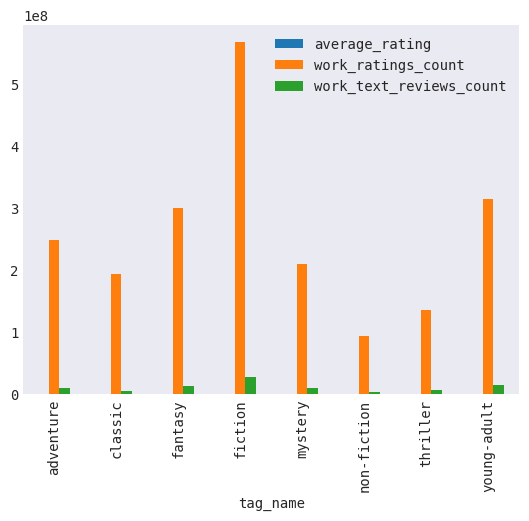

In [133]:
rating_genres.sort_values(by='average_rating', ascending=True)
rating_genres.set_index('tag_name').plot(kind = 'bar')

___I then imrpoved it by adjusting colors, adding labels, and enlarging the figsize___ 

___ChatGPT helped me write labels for the bars. I wanted to do this on my last project but did not know how, so I was glad I got to integrate into this one.___

___This chart is close to what I want to showcase but I wanted to better represent and define what exactly "Work Ratings Count" and "Text Reviews Count" actually are and organize the data in a more visually comprehensibe way.___



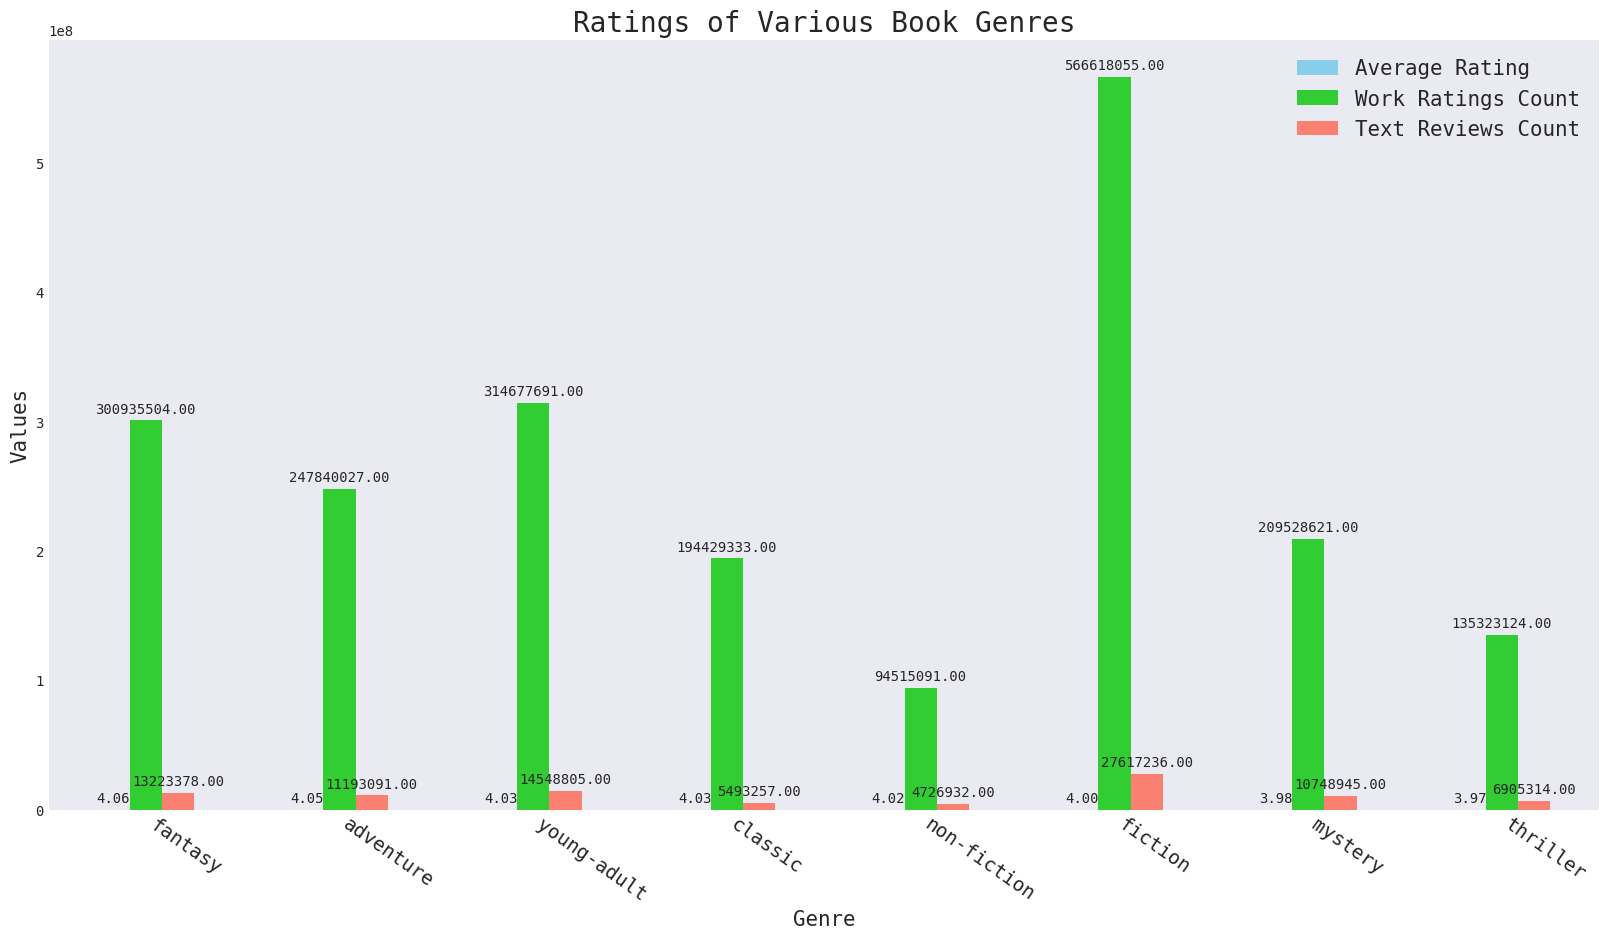

In [163]:
rating_genres_sorted = rating_genres.sort_values(by='average_rating', ascending=False).head(10)
plot_data = rating_genres_sorted[['tag_name', 'average_rating', 'work_ratings_count', 'work_text_reviews_count']]
plot_data.set_index('tag_name', inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
plot_data.plot(kind='bar', ax=ax, color=['skyblue', 'limegreen', 'salmon']
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

ax.set_title('Ratings of Various Book Genres', fontsize=20)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Values', fontsize=15)
ax.legend(['Average Rating', 'Work Ratings Count', 'Text Reviews Count'], fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-35, ha='left')
ax.tick_params(axis='x', labelsize=14)

plt.show()

## Final Visual

___Because the numbers are so drastically different from each other and the arguably most important element to display, "Average Rating", isn't even visable, I decided to separate it into three different bar graphs.___ 

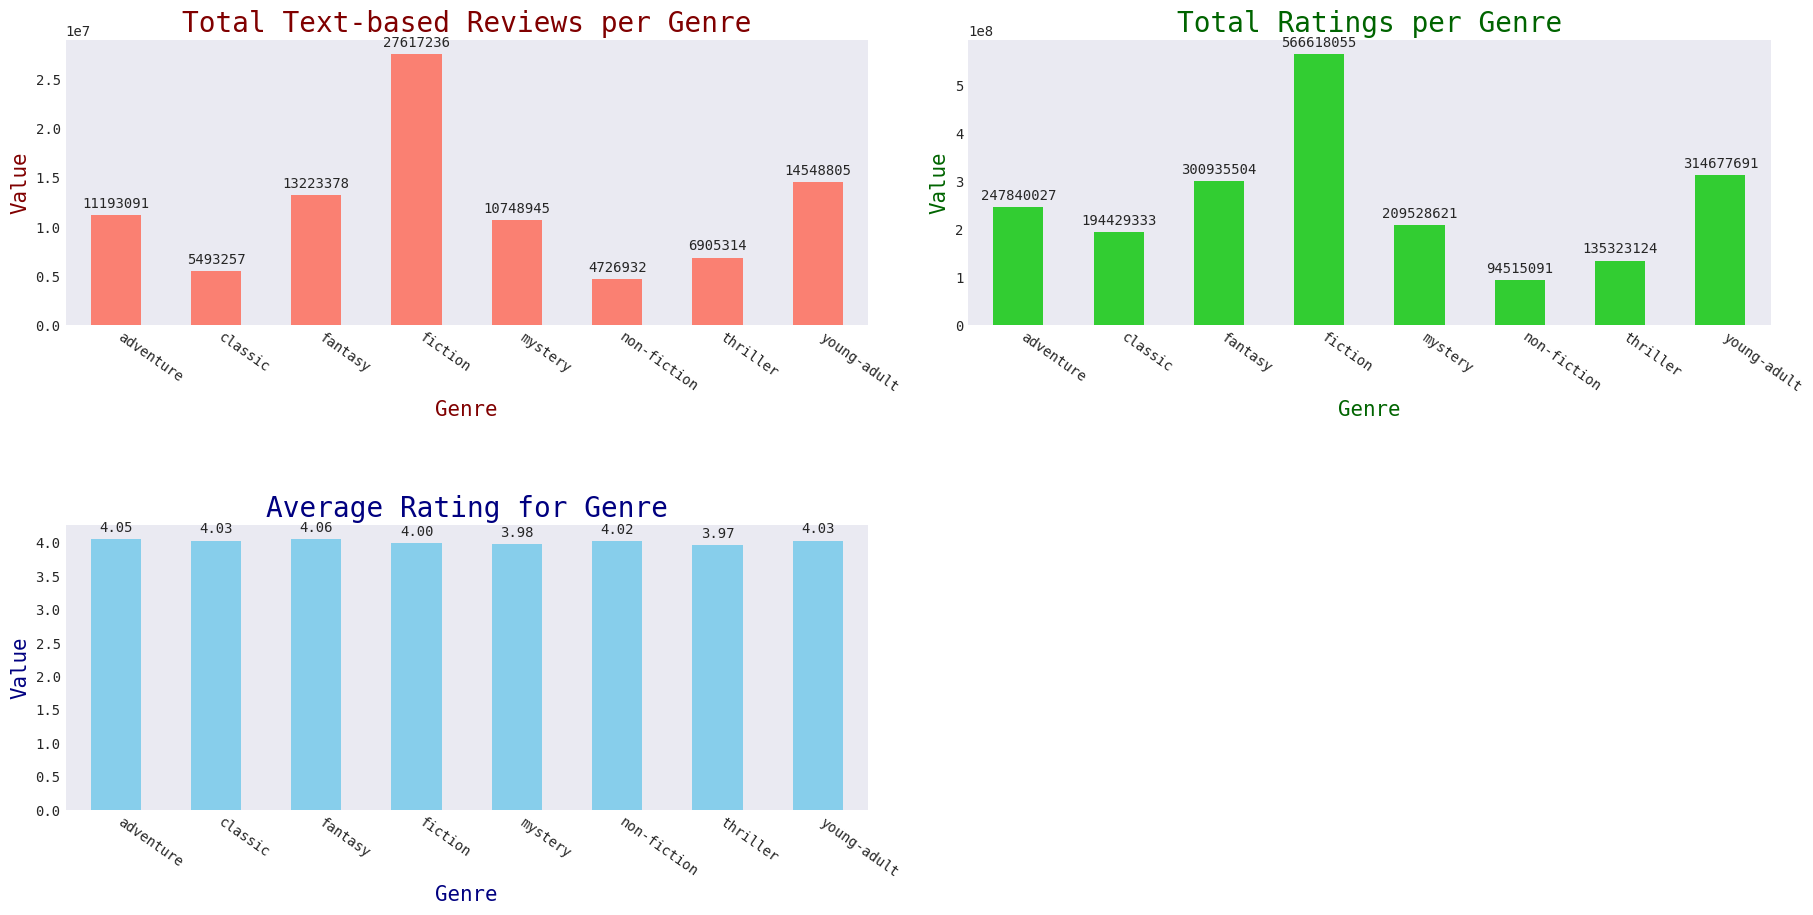

In [172]:
fig, ax = plt.subplots(2, 2, figsize=(22, 10))
plt.subplots_adjust(hspace=.7, wspace=0.125)
ax[1, 1].axis('off')

rating_genres_sorted_avg = rating_genres.sort_values(by='average_rating', ascending=False).head(10)
rating_genres_sorted_ratings = rating_genres.sort_values(by='work_ratings_count', ascending=False).head(10)
rating_genres_sorted_reviews = rating_genres.sort_values(by='work_text_reviews_count', ascending=False).head(10)

rating_genres_sorted_avg = rating_genres.set_index('tag_name')['average_rating'].plot(kind='bar', ax=ax[1, 0], color='skyblue')
rating_genres_sorted_ratings = rating_genres.set_index('tag_name')['work_ratings_count'].plot(kind='bar', ax=ax[0, 1], color='limegreen')
rating_genres_sorted_reviews = rating_genres.set_index('tag_name')['work_text_reviews_count'].plot(kind='bar', ax=ax[0,0], color='salmon')

ax[1, 0].set_title('Average Rating for Genre', fontsize=20, color = 'navy')
ax[0, 1].set_title('Total Ratings per Genre', fontsize=20, color = 'darkgreen')
ax[0, 0].set_title('Total Text-based Reviews per Genre', fontsize=20, color = 'maroon')

ax[1, 0].set_xlabel('Genre', fontsize=15, color='navy')
ax[0, 1].set_xlabel('Genre', fontsize=15, color = 'darkgreen')
ax[0, 0].set_xlabel('Genre', fontsize=15, color = 'maroon')

ax[1, 0].set_ylabel('Value', fontsize=15, color = 'navy')
ax[0, 1].set_ylabel('Value', fontsize=15, color = 'darkgreen')
ax[0, 0].set_ylabel('Value', fontsize=15, color = 'maroon')

ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=-35, ha='left')
ax[0,1].set_xticklabels(ax[0,0].get_xticklabels(), rotation=-35, ha='left')
ax[0,0].set_xticklabels(ax[0,1].get_xticklabels(), rotation=-35, ha='left')

ax[1, 0].bar_label(rating_genres_sorted_avg.containers[0], fmt='%.2f', padding=3)
ax[0, 1].bar_label(rating_genres_sorted_ratings.containers[0], fmt='%d', padding=3)
ax[0, 0].bar_label(rating_genres_sorted_reviews.containers[0], fmt='%d', padding=3)

plt.style.use('seaborn-v0_8-dark')
rcParams['font.family'] = 'monospace'

plt.show()

### Data Report Conclusion

I am a little dissapointed in the lack of variety of the "Average Rating" numbers. I was going to heavily rely on this to define "good" and "bad" genres. But I think I have to concure that based solely on those numbers, my results were inconclusive in determining "good" and "bad".

I believe this has to do with a few factors:
1. I didn't realize that the genres I selected are already generally considered "well-known". And these "popular" genres tend to receive higher ratings and reviews, which is the cause of their popularity. I should have chosen more variety between what qualifies as "well-known" and "niche" genres to truly analyze how popularity affects the ratings.

2. People who usually leave reviews on Goodreads likely _want_ to share how much they enjoyed them. So, the people taking the time to leave a rating are typically doing so to express their positive feelings toward it.

3. Goodreads is mainly used by self-declared "professional readers" and _already_ enjoy reading books so the ratings left are likely more positive because the people reading these genres _want_ to be. 

4. Additionally, may of these "readers" typically try to pick up books that personally interest them. So, someone who enjoys fantasy likely is not going to purposaly read a thriller, not like it, and then leave a review. More likely, the fantasy reader is going to pick up a fantasy book because that's what they know they like. And then they'll read it, enjoy it, and leave a positive rating. 

 

However, I do believe based on the Work Ratings Count (the total number of ratings for a genre) and the Text Reviews Count (the total number of text-based reviews for a genre) I can determine which genres in this particular set are more "popular". This shows that, based off the number of ratings left on it, Fiction is the most popular while "Classic" is least popular. 

Both of these counts, although there is a marginally large gap between them, are essentially the same shape and align with each other's fluxuations pretty accurately.

If I could confidentally compare the "Average Rating" with it, I would be able to determine the second part of my hypthosesis (if popularity correlates with what is considered "good" and "bad") but unfortunately the "Average Rating" was inconclusive.

The overall takeaway is it's easy to tell which of these genres are popular, but not so easy to determine the quality of these genre based off ratings and reviews.